# MLPClassifier for Multi-Class Classification

## IRIS

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


#### Load data

In [8]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### Split data

In [12]:
x = df.drop('species', axis=1)
y = df['species']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [13]:
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [14]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam').fit(trainX_scaled, trainY)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [15]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.93


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


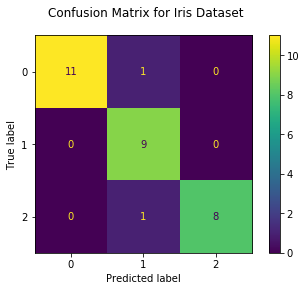

In [16]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [17]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      1.00      0.90         9
           2       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



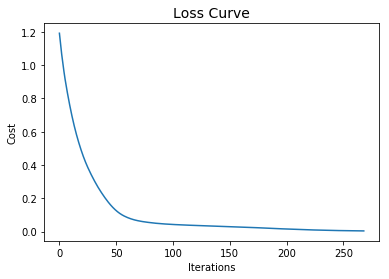

In [18]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [20]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'adam'}


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [21]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 1.00


# DIGITS RECOGNITION

In [47]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [48]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [49]:
print(digits.target[0])

0


<Figure size 432x288 with 0 Axes>

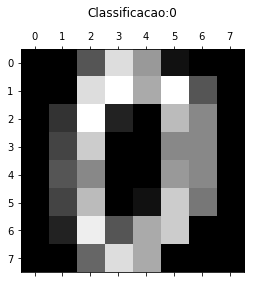

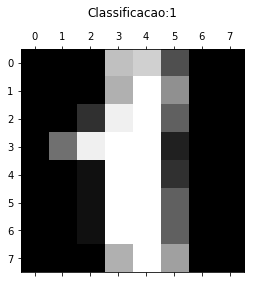

In [50]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
    plt.title("Classificacao:" + str(digits.target[i]) + "\n")

In [51]:

df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [52]:
# Model creation
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target, test_size = 0.2)

In [81]:
plt.gray()
for i in range(2):
    plt.matshow(trainX[i])
    plt.title("Classificacao:" + str(digits.target[i]) + "\n")

ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 432x288 with 0 Axes>

In [53]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((1437, 64), (360, 64), (1437,), (360,))

In [56]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(max_iter = 600,
                        solver = 'sgd',
                        learning_rate_init= 0.06)


param_grid = {'hidden_layer_sizes': [(200,), (100,)],
             'activation': ['logistic', 'relu']}
    
GridCV_MLP = GridSearchCV(clf_mlp, param_grid, verbose=1, cv=3).fit(trainX, trainY)
print("\n The best estimator across ALL searched params:\n", GridCV_MLP.best_estimator_)
print("\n The best score across ALL searched params:\n", GridCV_MLP.best_score_)
print("\n The best parameters across ALL searched params:\n", GridCV_MLP.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits

 The best estimator across ALL searched params:
 MLPClassifier(activation='logistic', hidden_layer_sizes=(200,),
              learning_rate_init=0.06, max_iter=600, solver='sgd')

 The best score across ALL searched params:
 0.9784272790535837

 The best parameters across ALL searched params:
 {'activation': 'logistic', 'hidden_layer_sizes': (200,)}


In [66]:
model = MLPClassifier(max_iter = 600,
                        solver = 'sgd',
                        learning_rate_init= 0.06,
                        activation= 'logistic',
                        hidden_layer_sizes = (200,)).fit(trainX, trainY)
y_pred = model.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.98


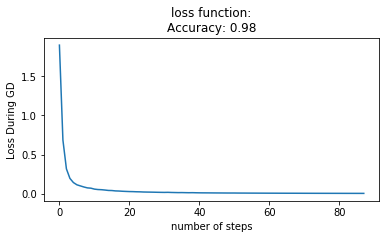

In [67]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(model.loss_curve_)

plt.xlabel("number of steps") 
plt.ylabel("Loss During GD")
plt.title('loss function:\nAccuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
plt.show()

In [68]:
pred_val_mlp = GridCV_MLP.predict(testX)

In [69]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    return acc_sc


acc_mlp = print_validation_report(testY, pred_val_mlp)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.94      1.00      0.97        34
           2       1.00      1.00      1.00        47
           3       1.00      0.97      0.99        35
           4       1.00      1.00      1.00        32
           5       0.93      0.96      0.95        28
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        50
           8       0.97      0.94      0.95        32
           9       0.97      0.94      0.95        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy : 0.9833333333333333


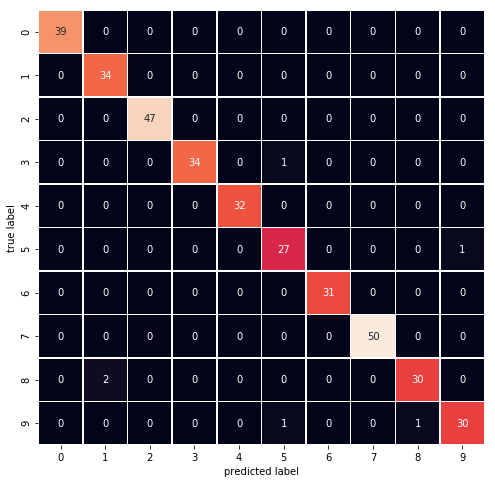

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

plot_confusion_matrix(testY, pred_val_mlp)

In [78]:

testX[0], testY[:5], pred_val_mlp[:5]

(array([ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16.,
        14.,  9.,  1.,  0.,  4., 13.,  6., 16.,  4.,  0.,  0.,  0.,  0.,
         2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16., 14., 12.,  2.,
         0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.]),
 array([7, 7, 1, 5, 4]),
 array([7, 7, 1, 9, 4]))

TypeError: Invalid dimensions for image data

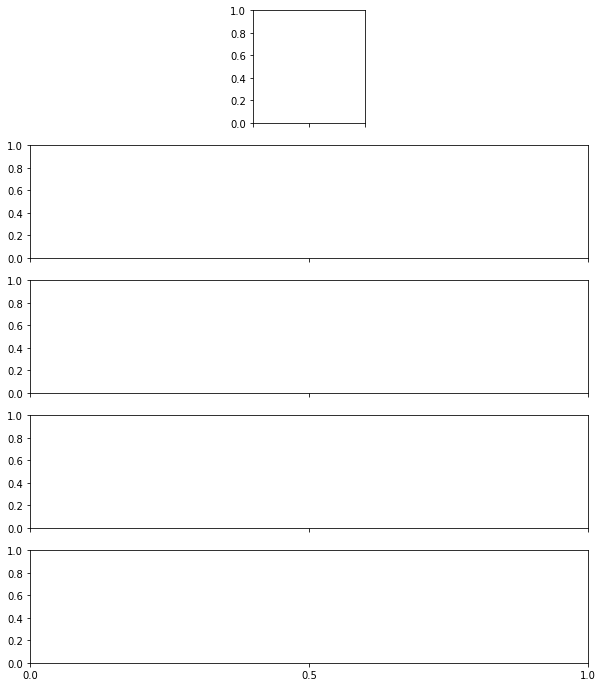

In [80]:
fig, axs = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10,12))
axs = axs.flatten()
for i, n  in enumerate(testY[:5]):
    im = testX[i]
    axs[i].imshow(im, cmap=plt.get_cmap('gray'))
    title = ("true: " + str(testY[i]) + "\npredicted: " + str(pred_val_mlp[i]))
    axs[i].set_title(title)


In [42]:
#pred_val_mlp != arr_y_val

NameError: name 'X_val' is not defined

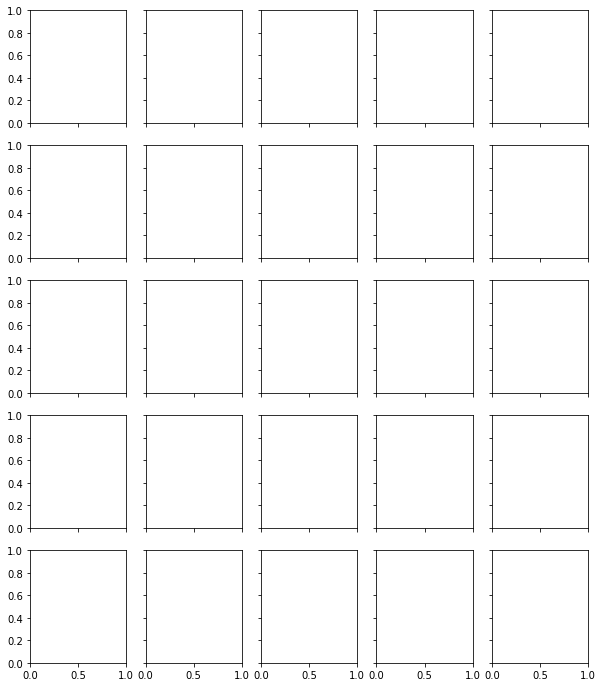

In [40]:
# pred_val_mlp = pred_val_cnn2
# testY = arr_y_va arr_y_val = y_val.values



arr_y_val = testY
false_cnn2 = pred_val_mlp != arr_y_val

fig, axs = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10,12))
axs = axs.flatten()
for i, n  in enumerate(false_cnn2[:25]):
    im = X_val[false_cnn2][i,:,:,0]
    axs[i].imshow(im, cmap=plt.get_cmap('gray'))
    title = ("predicted: " + str(pred_val_mlp[false_cnn2][i]) + 
            "\n" + "true: " + str(arr_y_val[false_cnn2][i]) )
    axs[i].set_title(title)
plt.tight_layout()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

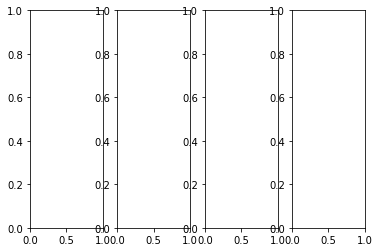

In [27]:
# plot 4 samples from the training/test set and their corresponding labels/prediction 
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()